In [26]:
import numpy as np
import time
import h5py

import tensorflow as tf
import tensorflow_io as tfio

%matplotlib inline
from matplotlib import pyplot as plt

In [2]:
!ls tests

dataset.hdf5  test_codexutils__pull_nuclei.ipynb  test_imports.ipynb


In [3]:
fpath = 'tests/dataset.hdf5'

In [43]:
channels = ['DAPI', 'CD45', 'PanCytoK']
channel_ds = [tfio.IODataset.from_hdf5(fpath, f'/cells/{c}') for c in channels]
def process_channels(*x):
    x = [x_ / tf.reduce_max(x_) for x_ in x]
    x = tf.stack(x, axis=-1)
    #x = x  / tf.reduce_max(x)
    return x
dataset = (tf.data.Dataset.zip(tuple(channel_ds))
           .map(process_channels)
           .shuffle(4096)
          )
dataset

<ShuffleDataset shapes: (64, 64, 3), types: tf.float32>

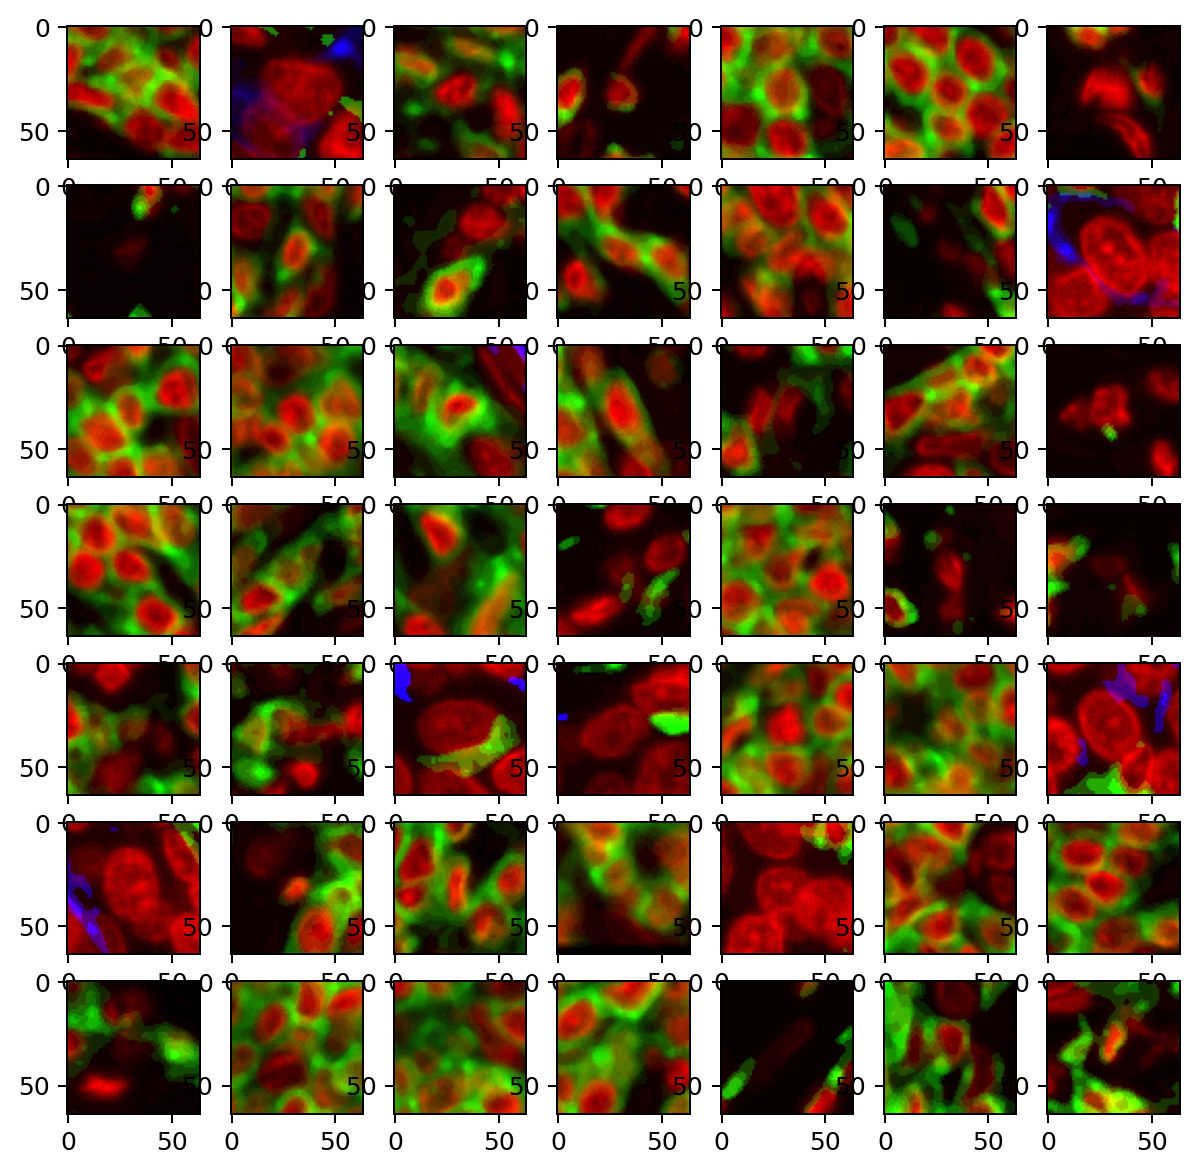

In [115]:
fig, axs = plt.subplots(7,7, figsize=(8,8), dpi=180)
for x, ax in zip(dataset, axs.ravel()):
    x = x.numpy()
    ax.imshow(x)
    